In [ ]:
                # Flags for jumps back and forward
                flag_jumps_back = False
                flag_jumps_forward = False
                #count_back = 1
                #count_forward = 1
                # Establish the auxiliar nodes to move back and forward
                aux_node_back = milestone_node
                aux_node_forward = milestone_node
                if options["verbose"]:
                    print('Checking this vertex:', milestone_node.item)
                # Compare the safety radius with the critical distance for the
                # closest edge (back)
                while (not approved_distance(aux_node_back, radius,
                                            vor_approx["vrtx"], 'back',
                                            options["verbose"])):
                       #and count_back < cell.lenght_list):
                    # Update the node, jumps and flag
                    aux_node_back = aux_node_back.pref
                    i += 1
                    #count_back += 1
                    flag_jumps_back = True
                # Compare the safety radius with the critical distance for the
                # closest edge (forward)
                while (not approved_distance(aux_node_forward, radius,
                                            vor_approx["vrtx"], 'forward',
                                            options["verbose"])):
                       #and count_forward < cell.lenght_list):
                    # Update the node, jumps and flag
                    aux_node_forward = aux_node_forward.nref
                    i += 1
                    #count_forward += 1
                    flag_jumps_back = True
                # Get coordinates
                vertex_start = vor_approx["vrtx"][aux_node_back.pref.item]
                vertex_mid1 = vor_approx["vrtx"][aux_node_back.item]
                vertex_mid2 = vor_approx["vrtx"][aux_node_forward.item]
                vertex_end = vor_approx["vrtx"][aux_node_forward.nref.item]
                # If jump then sharpen the intersection
                if flag_jumps_back or flag_jumps_forward:
                    vertex_mid1 = sharpen(vertex_start, vertex_mid1,
                                          vertex_mid2, vertex_end)
                # Get the new vertices in this sector
                sector = intersect(vertex_start, vertex_mid1, vertex_end,
                                   radius)
                # Assign the new intersection value to new_vertices
                new_vertices.append(sector[1])
                # Move the milestone_node and update the jump
                milestone_node = aux_node_forward.nref
                i += 1
            # Add the first vertex at the end to close the cell 
            new_vertices.append(new_vertices[0])

In [9]:
import numpy as np
from shapely.geometry import Polygon, LineString, MultiPolygon
import matplotlib.pyplot as plt
from shapely.ops import polygonize, unary_union

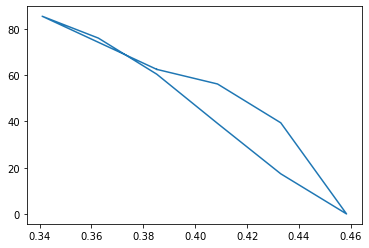

In [10]:
x = np.array([ 0.38517325,  0.40859912,  0.43296919,  0.4583215 ,  0.4583215 ,
               0.43296919,  0.40859912,  0.38517325,  0.36265506,  0.34100929])
y = np.array([ 62.5       ,  56.17977528,  39.39698492,   0.        ,
               0.        ,  17.34605377,  39.13341671,  60.4180932 ,
               76.02574417,  85.47008547])
polygon = Polygon(np.c_[x, y])
plt.plot(*polygon.exterior.xy)


In [11]:
# original data
ls = LineString(np.c_[x, y])
# closed, non-simple
lr = LineString(ls.coords[:] + ls.coords[0:1])
lr.is_simple  # False

False

In [12]:
mls = unary_union(lr)
mls.geom_type  # MultiLineString'

'MultiLineString'

In [13]:
for polygon in polygonize(mls):
    print(polygon)

POLYGON ((0.38517325 62.5, 0.40859912 56.17977528, 0.43296919 39.39698492, 0.4583215 0, 0.43296919 17.34605377, 0.40859912 39.13341671, 0.38517325 60.4180932, 0.3731393676594341 68.75893388859882, 0.38517325 62.5))
POLYGON ((0.3731393676594341 68.75893388859882, 0.34100929 85.47008547, 0.36265506 76.02574417, 0.3731393676594341 68.75893388859882))


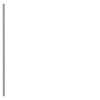

In [16]:
mp = MultiPolygon(list(polygonize(mls)))
mp